In [7]:
!pip install --upgrade pymupdf

In [8]:
import numpy as np
import pandas as pd

df = pd.read_csv("drive/MyDrive/postings.csv")
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,NaN,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,NaN,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,NaN,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,NaN,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN


In [9]:
df["job_posting_url"].isna().sum()

np.int64(0)

In [10]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips'],
      dtype='object')

In [11]:
i = 0
for _, row in df.iterrows():
  if "intern" in str(row["title"]).lower():
    i += 1
print(i)

1876


In [12]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# 3. Calculate the embedding similarities
similarities = model.similarity(model.encode(["I like studying"]), model.encode(["I like coding"]))
print(similarities)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tensor([[0.5901]])


In [13]:
"""
all_descriptions = np.array(df[df["description"].notna()]["description"])
all_similarities = np.array(model.encode(all_descriptions))
np.save('drive/MyDrive/encodings_jobs.npy', all_similarities)
"""
encoding_jobs = np.load("drive/MyDrive/encodings_jobs.npy")

In [14]:
jobs_list = np.array(df["description"])
encoding_i = 0
for i in range(len(jobs_list)):
  if not pd.isna(jobs_list[i]):
    jobs_list[i] = encoding_jobs[encoding_i]
    encoding_i += 1

df["encoding_jobs"] = jobs_list
df = df[df["encoding_jobs"].notna()]
df

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,encoding_jobs
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,"[-0.014352682, -0.03611055, -0.004915032, 0.02..."
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,"[0.013694301, -0.0428434, 0.03155379, 0.082232..."
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,"[-0.01586624, -0.0074909474, 0.042568583, -0.0..."
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,"[-0.0022293064, -0.005000699, -0.03991982, -0...."
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,"[0.007176443, -0.011080017, 0.027214041, 0.045..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,NaN,...,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0,"[-0.022569263, 0.001813484, 0.014393224, 0.021..."
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN,"[-0.0062346095, -0.13484141, 0.043831863, 0.02..."
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0,"[0.014659053, -0.020262267, -0.034580484, -0.0..."
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN,"[-0.021897782, -0.06471939, -0.026592918, 0.00..."


In [15]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips',
       'encoding_jobs'],
      dtype='object')

In [16]:
df.isna().sum()


,0
job_id,0
company_name,1718
title,0
description,0
max_salary,94050
pay_period,87770
location,0
company_id,1716
views,1689
med_salary,117562


In [17]:
#There are job options with med_salary but not max_salary
print(df[df["med_salary"].notna()]["max_salary"].isna().count())
#There are job options with max_salary but not med_salary
print(df[df["max_salary"].notna()]["med_salary"].isna().count())

new_df = df[((df["max_salary"].notna()) | (df["min_salary"].notna())) & (df["med_salary"].isna())]
job_ids = np.array(new_df["job_id"])
all_max = np.array(new_df["max_salary"])
all_min = np.array(new_df["min_salary"])
id2median = {}
for id, min_x, max_x in zip(job_ids, all_min, all_max):
  if pd.isna(min_x):
    min_x = max_x
  elif pd.isna(max_x):
    max_x = min_x
  elif pd.isna(min_x) and pd.isna(max_x):
    raise Exception("Both Na")
  id2median[id] = (min_x + max_x) / 2

def is_nan(val):
  try:
    int(val)
    return False
  except:
    return True

print(len(id2median), df["med_salary"].isna().sum())

6280
29792
29792 117562


In [18]:
all_ids = np.array(df["job_id"])
all_medians = np.array(df["med_salary"])
full_id2median = {}
for id, m in zip(all_ids, all_medians):
  if is_nan(m):
    full_id2median[id] = id2median.get(id)
  else:
    full_id2median[id] = m
df["med_salary"] = np.array(df["job_id"].apply(lambda id: full_id2median[id]))

df["med_salary"].isna().sum()

/tmp/ipython-input-353056866.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["med_salary"] = np.array(df["job_id"].apply(lambda id: full_id2median[id]))


np.int64(87770)

In [19]:
#We will only be looking at full time jobs
print(np.unique(df["work_type"]))
print(df[df["work_type"] == "FULL_TIME"].shape[0] / df.shape[0])
df = df[df["work_type"] == "FULL_TIME"]
print(df.shape)

['CONTRACT' 'FULL_TIME' 'INTERNSHIP' 'OTHER' 'PART_TIME' 'TEMPORARY'
 'VOLUNTEER']
0.7978472569887437
(98807, 32)


In [20]:
df["pay_period"].unique()

array(['HOURLY', 'YEARLY', nan, 'MONTHLY', 'WEEKLY', 'BIWEEKLY'],
      dtype=object)

In [21]:
new_med_salary = []
for i in range(df.shape[0]):
  row = df.iloc[i]
  if pd.isna(row["med_salary"]):
    new_med_salary.append(None)
  else:
    if row["pay_period"] == "BIWEEKLY":
      result = float(row["med_salary"])*26
      if row["med_salary"] > 20000:
        new_med_salary.append(float(row["med_salary"]))
      else:
        new_med_salary.append(result)
    elif row["pay_period"] == "HOURLY":
      result = float(row["med_salary"])*2080
      if row["med_salary"] > 1000:
        new_med_salary.append(float(row["med_salary"]))
      else:
        new_med_salary.append(result)
    elif row["pay_period"] == "MONTHLY":
      result = float(row["med_salary"])*12
      if row["med_salary"] > 40000:
        new_med_salary.append(float(row["med_salary"]))
      else:
        new_med_salary.append(result)
    elif row["pay_period"] == "WEEKLY":
      result = float(row["med_salary"])*52
      if row["med_salary"] > 20000:
        new_med_salary.append(float(row["med_salary"]))
      else:
        new_med_salary.append(result)
    else:
      if row["med_salary"] < 15000 and float(row["med_salary"])*2080 < 1000000:
        new_med_salary.append(float(row["med_salary"])*2080)
      else:
        new_med_salary.append(float(row["med_salary"]))

df["med_salary"] = new_med_salary
df

/tmp/ipython-input-261727900.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["med_salary"] = new_med_salary


,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips,encoding_jobs
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,38480.0,...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0,"[-0.014352682, -0.03611055, -0.004915032, 0.02..."
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,83200.0,...,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0,"[0.013694301, -0.0428434, 0.03155379, 0.082232..."
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,55000.0,...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0,"[-0.01586624, -0.0074909474, 0.042568583, -0.0..."
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,157500.0,...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0,"[-0.0022293064, -0.005000699, -0.03991982, -0...."
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,70000.0,...,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0,"[0.007176443, -0.011080017, 0.027214041, 0.045..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123844,3906267117,Lozano Smith,Title IX/Investigations Attorney,Our Walnut Creek office is currently seeking a...,195000.0,YEARLY,"Walnut Creek, CA",56120.0,1.0,157500.0,...,1.713571e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,94595.0,6013.0,"[-0.022569263, 0.001813484, 0.014393224, 0.021..."
123845,3906267126,Pinterest,"Staff Software Engineer, ML Serving Platform",About Pinterest:\n\nMillions of people across ...,NaN,NaN,United States,1124131.0,3.0,NaN,...,1.713572e+12,www.pinterestcareers.com,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN,"[-0.0062346095, -0.13484141, 0.043831863, 0.02..."
123846,3906267131,EPS Learning,"Account Executive, Oregon/Washington",Company Overview\n\nEPS Learning is a leading ...,NaN,NaN,"Spokane, WA",90552133.0,3.0,NaN,...,1.713572e+12,epsoperations.bamboohr.com,0,FULL_TIME,NaN,NaN,NaN,99201.0,53063.0,"[0.014659053, -0.020262267, -0.034580484, -0.0..."
123847,3906267195,Trelleborg Applied Technologies,Business Development Manager,The Business Development Manager is a 'hunter'...,NaN,NaN,"Texas, United States",2793699.0,4.0,NaN,...,1.713573e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN,"[-0.021897782, -0.06471939, -0.026592918, 0.00..."


/tmp/ipython-input-2662821947.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.distplot(df[df["med_salary"].notna()][df["med_salary"] < 1000000]["med_salary"])
/tmp/ipython-input-2662821947.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["med_salary"].notna()][df["med_salary"] < 1000000]["med_salary"])


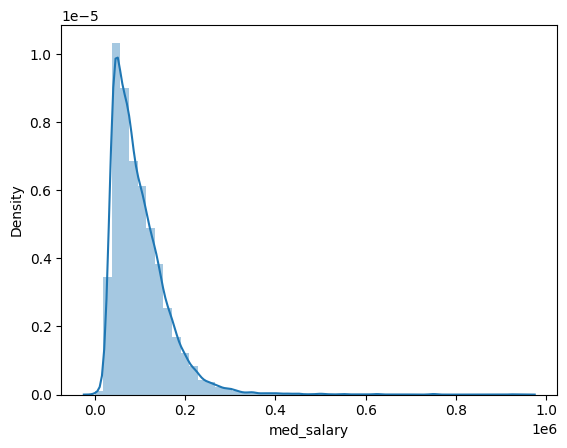

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df[df["med_salary"].notna()][df["med_salary"] < 1000000]["med_salary"])
plt.show()

In [23]:
import pymupdf
import re

def file_to_text(file):
  text = ""
  doc = pymupdf.open(file)
  for page in doc:
    text += str(page.get_text())
  text = re.sub(r'[^a-zA-Z0-9 .]', '', text)
  return text

In [24]:
df["location"] = df["location"].apply(lambda loc: loc.lower())
np.unique(df["location"])

/tmp/ipython-input-4020390313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["location"] = df["location"].apply(lambda loc: loc.lower())


array(['abbeville, la', 'abbeville, sc', 'abbott, tx', ...,
       'zephyrhills, fl', 'zion, il', 'zionsville, in'], dtype=object)

In [25]:
cities = pd.read_csv("drive/MyDrive/uscities.csv")
cities["city_name"] = cities.apply(lambda row: f"{row.city}, {row.state_id}".lower(), axis=1)
cities["city_name"]

,city_name
0,"new york, ny"
1,"los angeles, ca"
2,"chicago, il"
3,"miami, fl"
4,"dallas, tx"
...,...
28333,"gross, ne"
28334,"lotsee, ok"
28335,"the ranch, mn"
28336,"shamrock, ok"


In [26]:
def city_to_location(city):
  the_city = cities[cities["city_name"] == city]
  lat = the_city["lat"]
  long = the_city["lng"]
  if len(lat) > 0:
    return (float(lat.iloc[0]), float(long.iloc[0]))
  return (None, None)

all_locations = np.unique(df["location"])
loc2coord = {}
for loc in all_locations:
  loc2coord[loc] = city_to_location(loc)

In [27]:
  import pickle
  with open('loc2coord.pkl', 'wb') as f:
      pickle.dump(loc2coord, f)


In [46]:
import pickle
with open('loc2coord.pkl', 'rb') as f:
    loc2coord = pickle.load(f)

In [29]:
df["lat"] = df["location"].apply(lambda c: loc2coord.get(c)[0])
df["lng"] = df["location"].apply(lambda c: loc2coord.get(c)[1])

print(df[["lat", "lng"]].isna().sum())

lat    20928
lng    20928
dtype: int64


/tmp/ipython-input-2784052888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lat"] = df["location"].apply(lambda c: loc2coord.get(c)[0])
/tmp/ipython-input-2784052888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lng"] = df["location"].apply(lambda c: loc2coord.get(c)[1])


In [30]:
context = str(df[df["formatted_experience_level"] == "Entry level"]["description"].iloc[1])

In [31]:
descs_df = df[df["formatted_experience_level"] == "Entry level"]
descs = np.array(descs_df["description"])
descs_str = " ".join(descs)
num_words = descs_str.split()
print(len(descs))



29399


In [32]:
from sentence_transformers import SentenceTransformer, util

model = SentenceTransformer('all-MiniLM-L6-v2')

entry_prompt = "This is an entry-level job requiring little or no experience."
entry_embedding = model.encode([entry_prompt])[0]
non_entry_prompt = "This job requires several years of experience or management responsibilities."
non_entry_embedding = model.encode([non_entry_prompt])[0]

def classify_job(text):
    embeddings = model.encode([text, entry_prompt, non_entry_prompt])
    sim_to_entry = model.similarity(embeddings[0], embeddings[1])
    sim_to_non_entry = model.similarity(embeddings[0], embeddings[2])
    if sim_to_entry > sim_to_non_entry:
      return "entry-level"
    else:
      return "non entry-level"

print(classify_job(df[df["formatted_experience_level"] != "Entry level"]["description"].iloc[3]))


non entry-level


In [6]:
descs_encode = model.encode(descs)
sims_to_entry = model.similarity(descs_encode, entry_embedding)
sims_to_non_entry = model.similarity(descs_encode, non_entry_embedding)


In [ ]:
sims_to_entry

In [ ]:
len(sims_to_non_entry)

In [ ]:
desc2entry = {}
i = 0
for e, non_e in zip(sims_to_entry, sims_to_non_entry):
  d = descs[i]
  if e > non_e:
    desc2entry[d] = "Entry level"
  else:
    desc2entry[d] = "Not entry level"
  i += 1

In [ ]:
list_values = list(desc2entry.values())
print(list_values.count("Not entry level") / len(list_values))

In [ ]:
def desc_exp(d, experience):
  if desc2entry.get(d) is None:
    return experience
  return desc2entry[d]

print(df[df["formatted_experience_level"] == "Entry level"].shape)

experiences = []
for i in range(df.shape[0]):
  row = df.iloc[i]
  experiences.append(desc_exp(row["description"], row["formatted_experience_level"]))

df["formatted_experience_level"] = np.array(experiences)

print(df[df["formatted_experience_level"] == "Entry level"].shape)

In [ ]:
#df.to_csv("drive/MyDrive/postings_updated.csv", index=False)

In [33]:
import numpy as np
import pandas as pd

df = pd.read_csv("drive/MyDrive/postings_updated.csv")

/tmp/ipython-input-1911899353.py:4: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("drive/MyDrive/postings_updated.csv")


In [34]:
df.columns

Index(['job_id', 'company_name', 'title', 'description', 'max_salary',
       'pay_period', 'location', 'company_id', 'views', 'med_salary',
       'min_salary', 'formatted_work_type', 'applies', 'original_listed_time',
       'remote_allowed', 'job_posting_url', 'application_url',
       'application_type', 'expiry', 'closed_time',
       'formatted_experience_level', 'skills_desc', 'listed_time',
       'posting_domain', 'sponsored', 'work_type', 'currency',
       'compensation_type', 'normalized_salary', 'zip_code', 'fips',
       'encoding_jobs', 'lat', 'lng'],
      dtype='object')

In [35]:
np.unique(df["remote_allowed"])

array([ 1., nan])

In [ ]:
!pip install xlsxwriter

In [ ]:
for col in df.columns:
  if df[col].dtype == object:
    df[col] = df[col].fillna("Unknown")
  else:
    df[col] = df[col].fillna(0)

dropped_cols = ["job_id", "job_posting_url", "application_url", "skills_desc", "currency", "encoding_jobs", "original_listed_time", "normalized_salary"]
df = df.drop(dropped_cols, axis=1)
df.to_excel("drive/MyDrive/postings_updated.xlsx", engine="xlsxwriter", index=False)


In [ ]:
df["med_salary"]

In [ ]:
#np.save("descs.npy", np.array(descs))

In [ ]:
descs[0]

In [36]:
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):
    r = 6371 # km
    p = pi / 180

    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return (2 * r * asin(sqrt(a))) / 1.609

In [42]:
def text_to_similar(text, num_jobs, salary_min=None, city_provided="", dist_limit=None, entry_level=False):
  new_df = df.copy()
  if entry_level:
    new_df = new_df[new_df["formatted_experience_level"] == "Entry level"]

  if loc2coord.get(city_provided.lower()) is not None:
    lat, lng = loc2coord[city_provided.lower()]
    new_df = new_df[new_df["lat"].notna()]
    new_df["Distance"] = new_df.apply(lambda row: distance(row.lat, row.lng, lat, lng), axis=1)
    new_df = new_df[new_df["Distance"] <= dist_limit]

  if salary_min is not None:
    new_df = new_df[(new_df["med_salary"].notna()) & (new_df["med_salary"] >= salary_min)]

  all_encodings = [np.asarray(np.matrix(new_df["encoding_jobs"].iloc[i]))[0].astype(float) for i in range(new_df.shape[0])]
  #print(all_encodings[0])
  #encodings_tensor = torch.tensor(np.stack(all_encodings))
  sims = np.array(model.similarity(np.array(model.encode(text)).astype(float), all_encodings))[0]
  """
  all_encodings = [np.array(new_df["encoding_jobs"].iloc[i]) for i in range(new_df.shape[0])]
  sims = np.array(model.similarity(model.encode([text]), all_encodings))[0]
  """
  index2sim = {i: s for i, s in enumerate(sims)}
  index2sim = dict(sorted(index2sim.items(), key=lambda item: item[1], reverse=True))
  the_jobs_index = list(index2sim.keys())[:num_jobs]
  specific_sims = list(index2sim.values())[:num_jobs]

  BOLD = '\033[1m'
  END = '\033[0m'
  output = "\n"
  for i, s in zip(the_jobs_index, specific_sims):
    row = new_df.iloc[i]
    link = str(row["job_posting_url"])


    the_salary = row["med_salary"]
    if pd.isna(the_salary):
      the_salary = "N/A"
    output +=  BOLD + str(row["title"]) + " | " + f"{s*100:.1f}% match" + " | " + \
          f"${the_salary} salary\n" + "Location: " + str(row["location"]) + END + "\n"
    output += str(new_df.iloc[i]["description"]).strip()+"\n\n\n"


  return output


print(text_to_similar(input("Enter description: "), 5, None, "San Francisco, CA", 50, False))

Enter description: Statistics and math

Informatics Programmer Analyst | 28.3% match | $N/A salary
Location: san francisco, ca
IT EDW Operations

Full Time

77910BR

Job Summary

The programmer analyst role includes the interpretation of complex requirements from detailed specifications to identify the correct fields for data extraction, applying analytical techniques for validation and cleaning, and preparation of data for in-depth analysis. This involves selecting appropriate patient cohorts, applying sophisticated programming strategies to configure data to researchers’ specification, and confirming value meet researchers’ expectations. The focus is on effectively managing and interpreting large volumes of data to derive meaningful insights. The programmer analyst will play a pivotal role in supporting researchers and Principal Investigators by employing analytical tools such as python, SQL, SAS, R, or Stata to work with electronic medical records and claims data. The ultimate aim i

In [45]:
def file_to_similar(file, num_jobs, salary_min=None, city_provided="", dist_limit=None, entry_level=False):
  the_text = file_to_text(file)
  return text_to_similar(the_text, num_jobs, salary_min, city_provided, dist_limit, entry_level)

print(file_to_similar("drive/MyDrive/Arnav Sharma Resume.pdf", 5, None, "San Francisco, CA", 50, False))


Academic Instructor - Mathematics | 47.9% match | $N/A salary
Location: san jose, ca
Description:
Job Summary: Performs as an instructor in a regular classroom setting, presenting instructions in designated subject areas.
Duties/Responsibilities:Conducts and manages academic classes. Demonstrates and abides by the Company Core Values and the operating principles.Responsible for helping students achieve TABE gains, attainment in assigned subject areas, and/or HSD/HSE obtainment.Responsible for meeting department goals and objectives as assigned by department manager.Promotes a positive and desirable atmosphere within the classroom setting to insure maximum student motivation.Maintains a high degree of discipline within the classroom setting in order to insure maximum learning.Documents student's records according to requirements of PRH and SOPs; accesses and inputs all relevant student data, including but not limited to student attendance, performance, progress, positive behavior, and 